Dataset:
         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
R-squared: 0.48
Mean Squared Error (MSE): 2821.75


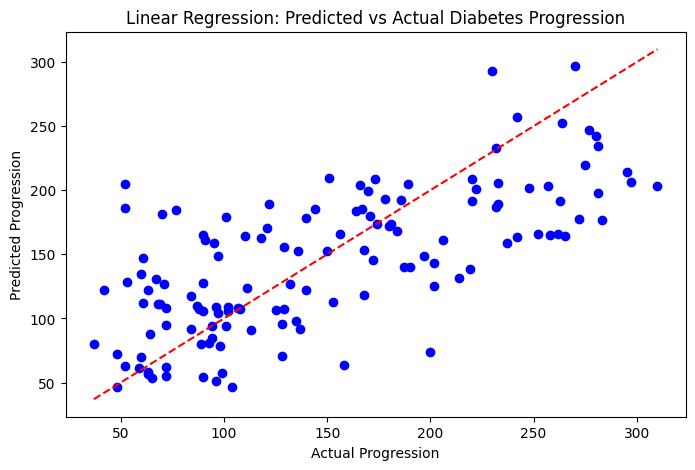

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes  # Importing the diabetes dataset

# Load the diabetes dataset
diabetes = load_diabetes()

# Convert the dataset into a DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Display the first few rows of the dataset
print("Dataset:\n", df.head())

# Features (X) and Target (y)
X = df[diabetes.feature_names]  # All the feature columns
y = df['target']  # Target variable (diabetes progression)

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = linear_reg.predict(X_test)

# Model Accuracy (R-squared)
r_squared = linear_reg.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")

# Mean Squared Error (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Visualizing the predicted vs actual values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Linear Regression: Predicted vs Actual Diabetes Progression")
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.show()
